In [35]:
# !pip install yfinance
import requests as req
import pandas as pd
from bs4 import BeautifulSoup as BS
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [36]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [38]:
tesla=yf.Ticker("TSLA")
tesla

yfinance.Ticker object <TSLA>

In [40]:
tesla_data=tesla.history(period="max")
tesla_data.reset_index(inplace=True)

In [43]:
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [44]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [88]:
html_data=req.get(url).content

In [89]:
soup=BS(html_data,"html.parser")

In [90]:
l=[]
for row in tables[0].find(name="tbody").find_all(name="tr"):
    values=row.find_all(name="td")
    date=values[0].string
    rev=values[1].string
    l.append({"Date":date,"Revenue":rev})
tesla_revenue=pd.DataFrame(columns=["Date","Revenue"],data=l)
tesla_revenue["Revenue"]=tesla_revenue["Revenue"].str.replace("$","").str.replace(",","").astype("int")

In [92]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.head(5)

,Date,Revenue
0,2020,6466
1,2019,8285
2,2018,8547
3,2017,7965
4,2016,9364


In [59]:
gamestop=yf.Ticker("GME")

In [61]:
gme_data=gamestop.history(period="max")
gme_data.reset_index(inplace=True)

In [62]:
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [63]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [65]:
html_data_2=req.get(url).text
soup=BS(html_data_2,"html.parser")

In [76]:
tables=soup.find_all(name="table")
# for table in tables:
    # print(table.thead.tr.text)
# tables[0]

In [93]:
l=[]
for row in tables[0].find(name="tbody").find_all(name="tr"):
    values=row.find_all(name="td")
    date=values[0].string
    rev=values[1].string
    l.append({"Date":date,"Revenue":rev})
gme_revenue=pd.DataFrame(columns=["Date","Revenue"],data=l)
gme_revenue["Revenue"]=gme_revenue["Revenue"].str.replace("$","").str.replace(",","").astype("int")

In [94]:
df.tail(5)

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


D:\Program Files\Anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\Program Files\Anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



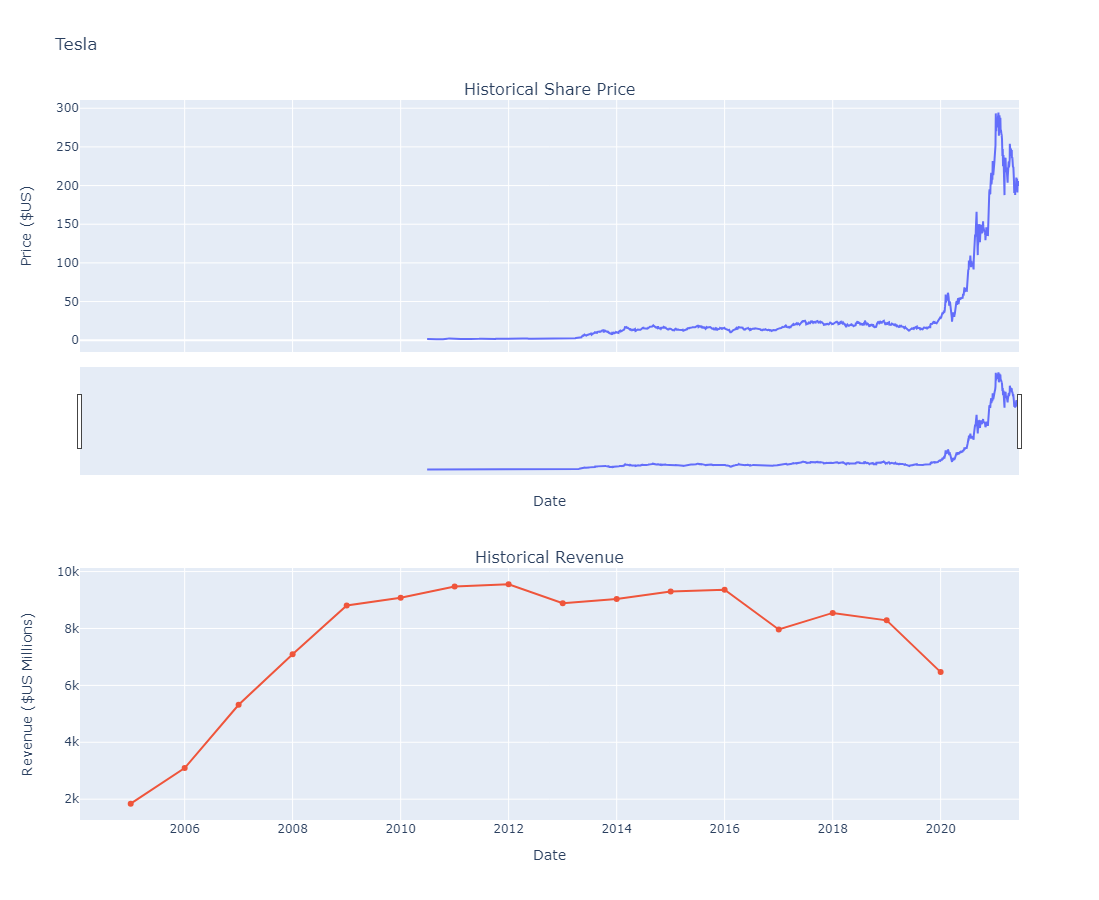

In [98]:
make_graph(tesla_data,tesla_revenue,"Tesla")

D:\Program Files\Anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\Program Files\Anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



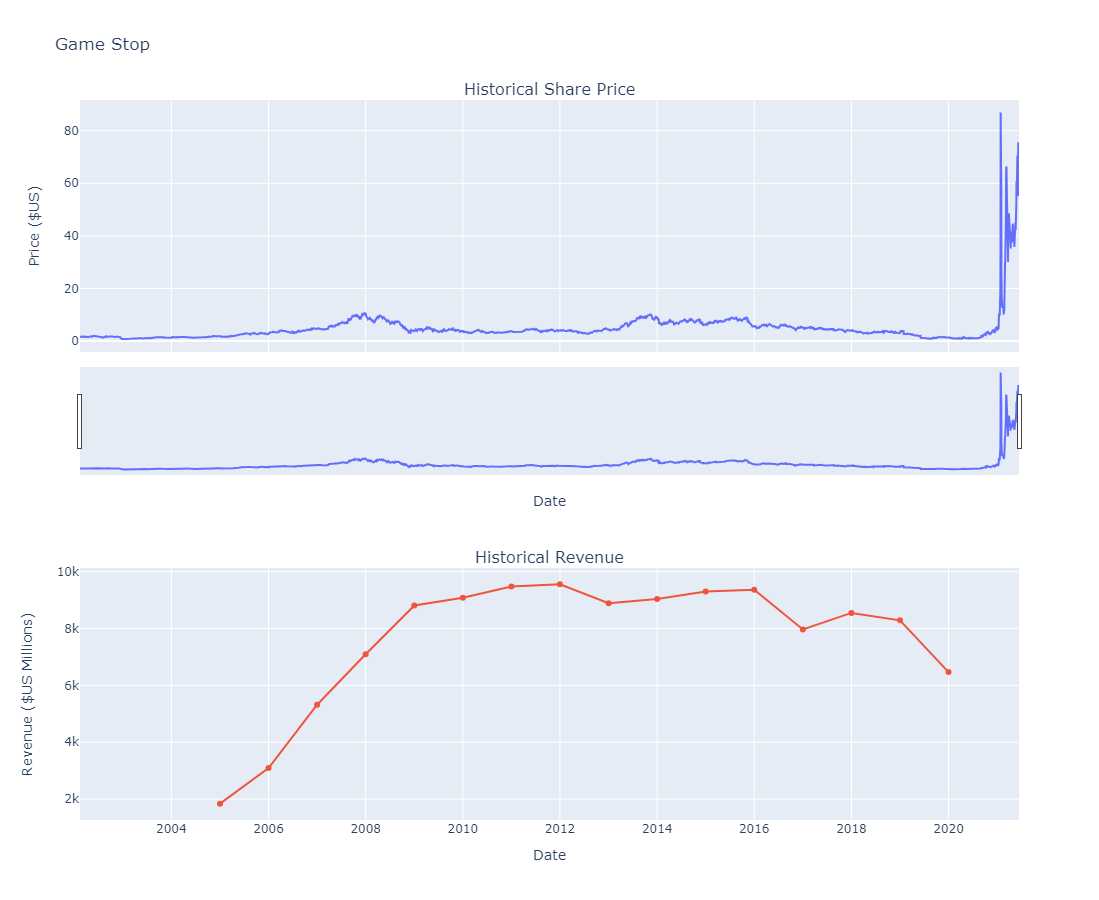

In [97]:
make_graph(gme_data,gme_revenue,"Game Stop")